In [1]:
#######DB instance identifier - database-1
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import re
import numpy as np
import ktrain
from ktrain import text
username = ''
password = ''
import torch
import seaborn as sns
hostname = ''
port = 



db = pymysql.connect(host=hostname, user=username, password=password)

cursor = db.cursor()



db_data = ''
engine = create_engine(db_data)






C:\Users\Mario Hage\DS Springboard\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
sql50 = '''use wsb'''
cursor.execute(sql50)

0

In [3]:
#### Example Date Extraction - df = pd.read_sql("SELECT * FROM wallstreetbets WHERE comment_date >= '2021-01-21 06:00:00' and comment_date <= '2021-01-21 06:23:39'", con=engine)



In [4]:
df = pd.read_sql("SELECT * FROM wallstreetbets WHERE comment_date >= '2021-01-25 09:00:00' and comment_date <= '2021-01-25 20:00:00'", con=engine)



In [5]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 100)
print(df)



       comment_id comment_parent_id  \
0       gkpgpj7    t1_gkpgo9f         
1       gkpgpjt    t1_gkpg7rk         
2       gkpgpkg    t1_gkpg5dk         
3       gkpgpkn    t3_l4lmrx          
4       gkpgpkt    t3_l4lmrx          
...         ...          ...          
268900  gkr7463    t3_l4xje1          
268901  gkr7466    t1_gkr6mry         
268902  gkr746x    t1_gkr6gk0         
268903  gkr7476    t1_gkr4j4e         
268904  gkr747d    t1_gkr7132         

                                                                                                                                                                                                                                                                    comment_body  \
0       These are rookie numbers                                                                                                                                                                                                                               

In [6]:
## creating new column with tickers found in each comment

stock_symbols = ['aapl', 'googl', 'nflx', 'msft', 'nok', 'tsla', 'bb', 'nok', 'posh','amc', 'psth', 'srne', 'cldr', 'baba', 'sq', 'qs', 'penn', 'spy', 'uber', 'dash', 'abnb', 'snow', 'pltr', 'xpev', 'nio', 
'wmt', 'zm', 'mgm', 'nvda', 'dks', 'gld', 'rkt', 'pfe', 'intc', 'spce', 'etsy', 'dis', 'roku', 'lyft', 'twtr', 'fsly', 'amzn', 'fb', 'gpro', 'amd',
'mu', 'bac', 'gme', 'snap', 'aal', 'ual', 'crm', 'shop', 'tgt', 'plug', 'acb', 'mrna', 'nclh', 'sbux', 'nkla', 'rcl', 'jblu', 'arkk', 'tlry', 'icln']
 

def matcher(x):
    for i in stock_symbols:
        if i.lower() in x.lower():
            return i.upper()
    else:
        return np.nan

df['ticker'] = df['comment_body'].apply(matcher)

testingsample = df.comment_body.head(50)

testingsample.to_csv(r'testsample.txt', header=None, index=None, sep=' ', mode='a')

In [7]:
## grouping by ticker/hour to find comment count

df = df.dropna()
df['hour'] = df['comment_date'].dt.hour



df2 = df.groupby(['ticker','hour'], as_index=False).comment_body.count()

df3 = df2.sort_values(by=['hour', 'comment_body'], ascending=[True, False])

df3.rename(columns = {'comment_body': 'comment_count'}, inplace = True)
df3.set_index('ticker')

df3.reset_index()


,index,ticker,hour,comment_count
0,74,BB,9,1801
1,118,GME,9,1417
2,325,SQ,9,565
3,170,MU,9,553
4,66,BAC,9,522
...,...,...,...,...
384,26,ACB,16,1
385,86,CRM,16,1
386,242,POSH,16,1
387,285,SBUX,16,1


In [8]:
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()


In [9]:
##downloading stock data

tickers = ['aapl', 'googl', 'nflx', 'msft', 'nok', 'tsla', 'bb', 'nok', 'posh','amc', 'psth', 'srne', 'cldr', 'baba', 'sq', 'qs', 'penn', 'spy', 'uber', 'dash', 'abnb', 'snow', 'li', 'pltr', 'xpev', 'nio', 
'wmt', 'zm', 'mgm', 'nvda', 'dks', 'gld', 'rkt', 'pfe', 'intc', 'spce', 'etsy', 'dis', 'roku', 'lyft', 'twtr', 'fsly', 'amzn', 'fb', 'gpro', 'amd',
'mu', 'bac', 'gme', 'snap', 'aal', 'ual', 'crm', 'shop', 'tgt', 'plug', 'acb', 'mrna', 'nclh', 'sbux', 'nkla', 'rcl', 'jblu', 'arkk', 'tlry', 'icln']

dataset = yf.download(tickers, start="2021-01-25", end="2021-01-26", interval="60m")

dataset.columns

[*********************100%***********************]  65 of 65 completed


MultiIndex([('Adj Close',  'AAL'),
            ('Adj Close', 'AAPL'),
            ('Adj Close', 'ABNB'),
            ('Adj Close',  'ACB'),
            ('Adj Close',  'AMC'),
            ('Adj Close',  'AMD'),
            ('Adj Close', 'AMZN'),
            ('Adj Close', 'ARKK'),
            ('Adj Close', 'BABA'),
            ('Adj Close',  'BAC'),
            ...
            (   'Volume', 'SRNE'),
            (   'Volume',  'TGT'),
            (   'Volume', 'TLRY'),
            (   'Volume', 'TSLA'),
            (   'Volume', 'TWTR'),
            (   'Volume',  'UAL'),
            (   'Volume', 'UBER'),
            (   'Volume',  'WMT'),
            (   'Volume', 'XPEV'),
            (   'Volume',   'ZM')],
           length=390)

### Price Data

In [10]:
dataset10 = dataset.unstack(level='Datetime')


dataset10.index.names = ['Description','ticker', 'date']

df50 = pd.DataFrame(dataset10)

df51 = df50.rename(columns={0: "price"})

df52 = df51.reset_index()



df52['hour'] = df52['date'].dt.hour

df53 = df52[df52['Description'] == 'Adj Close']

df54 = df53.drop(columns=['Description', 'date'])

display(df54)

,ticker,price,hour
0,AAL,15.430000,9
1,AAL,15.180000,10
2,AAL,15.230000,11
3,AAL,15.369900,12
4,AAL,15.370100,13
...,...,...,...
450,ZM,386.619995,11
451,ZM,392.179993,12
452,ZM,392.000000,13
453,ZM,386.769989,14


In [11]:
##merging stock price data with comment count data
tickersmerged = df3.merge(df54, how='left', on=['hour', 'ticker'])

tickersmergedsorted = tickersmerged.sort_values('comment_count', ascending=False)


display(tickersmergedsorted)

,ticker,hour,comment_count,price
48,BB,10,2612,18.240000
100,BB,11,2576,17.131100
151,GME,12,2339,69.319901
152,BB,12,2237,16.548500
101,GME,11,2096,72.709999
...,...,...,...,...
189,ETSY,12,1,210.395004
190,LYFT,12,1,46.459999
191,MRNA,12,1,142.720001
192,NFLX,12,1,558.054993


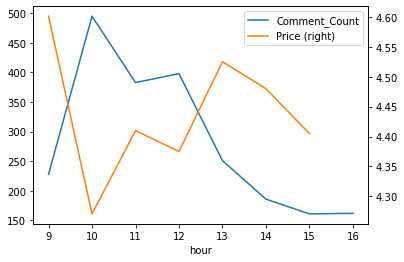

In [12]:
def plotticker(stockticker):

    new = tickersmergedsorted[tickersmergedsorted['ticker'] == stockticker]



    new1 = new.set_index('hour')
    new1 = new1.sort_values('hour', ascending=False)
    new1.comment_count.plot(label="Comment_Count", legend=True)
    new1.price.plot(secondary_y=True, label="Price", legend=True)


plotticker('AMC')

### no correlation found between stock price/comment counts

### Volume Data

In [13]:
dataset20 = dataset.unstack(level='Datetime')


dataset20.index.names = ['Description','ticker', 'date']

df500 = pd.DataFrame(dataset10)

df501 = df500.rename(columns={0: "Volume"})

df502 = df501.reset_index()



df502['hour'] = df502['date'].dt.hour

df503 = df502[df502['Description'] == 'Volume']

df504 = df503.drop(columns=['Description', 'date'])

tickersmerged1 = df3.merge(df504, how='left', on=['hour', 'ticker'])

tickersmergedsorted1 = tickersmerged1.sort_values('comment_count', ascending=False)

tickersmergedsorted1.columns



Index(['ticker', 'hour', 'comment_count', 'Volume'], dtype='object')

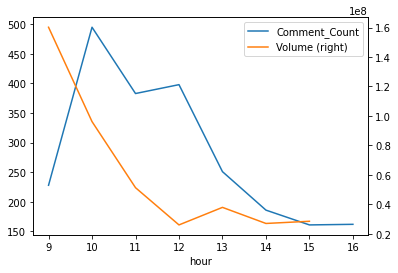

In [14]:
def plottickervolume(stockticker):

    new5 = tickersmergedsorted1[tickersmergedsorted['ticker'] == stockticker]



    new6 = new5.set_index('hour')
    new6 = new6.sort_values('hour', ascending=False)
    new6.comment_count.plot(label="Comment_Count", legend=True)
    new6.Volume.plot(secondary_y=True, label="Volume", legend=True)


plottickervolume('AMC')

## volume of trades correlated with  comment count

In [16]:
from transformers import InputExample, InputFeatures


In [17]:
## using the ProsusAI/Finbert model

from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")

model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert", num_labels=3)



In [18]:
from transformers import pipeline
nlp = pipeline("sentiment-analysis", model='ProsusAI/finbert')

In [19]:
##testing ProsusAI Model
print(nlp("AAPL will close at 390+ EOD"))

[{'label': 'neutral', 'score': 0.9413979649543762}]


In [91]:
dfsample = df.head(50)


dfsample['Sentiment'] = nlp([i for i in dfsample['comment_body']])

<ipython-input-91-46a85376ed91>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsample['Sentiment'] = nlp([i for i in dfsample['comment_body']])


In [100]:
## cleaning data, and filtering for comments with a length of < 150. Any higher ruins the algorithm

df['LenComments'] = df['comment_body'].astype(str).map(len)

df3 = df[df['LenComments'] < 150]  

df3 = df3.sample(1000)
df3['Sentiment'] = nlp([i for i in df3['comment_body']])



In [135]:
## more cleaning
df3['Sentiment'] = df3['Sentiment'].astype(str)

df3["ScoreNum"] = df3['Sentiment'].str.extract('([0-9]+[,./]*[0-9]*)')

In [186]:
df3['SentType'] = df3['SentType'].str.replace("'", "")
df3['ScoreNum'] = df3.ScoreNum.astype(float)
df3 = df3.groupby(['ticker','hour', 'SentType'], as_index=False).ScoreNum.mean()

display(df3)

,ticker,hour,SentType,ScoreNum
0,AAPL,9,neutral,0.886027
1,AAPL,9,positive,0.637317
2,AAPL,10,neutral,0.885296
3,AAPL,11,neutral,0.866427
4,AAPL,12,neutral,0.634220
5,AAPL,14,neutral,0.842340
6,AAPL,14,positive,0.568531
7,AAPL,16,neutral,0.929639
8,AMC,9,neutral,0.829227
9,AMC,10,neutral,0.858607


In [171]:
sentimentmerged = df3.merge(df54, how='left', on=['hour', 'ticker'])



In [178]:
pd.set_option('display.max_rows', 500)

display(sentimentmerged.head(200))

,ticker,hour,SentType,ScoreNum,price
0,AAPL,9,neutral,0.886027,144.229996
1,AAPL,9,positive,0.637317,144.229996
2,AAPL,10,neutral,0.885296,141.220001
3,AAPL,11,neutral,0.866427,141.190002
4,AAPL,12,neutral,0.634220,142.989899
5,AAPL,14,neutral,0.842340,142.070007
6,AAPL,14,positive,0.568531,142.070007
7,AAPL,16,neutral,0.929639,NaN
8,AMC,9,neutral,0.829227,4.601300
9,AMC,10,neutral,0.858607,4.270500


<AxesSubplot:>

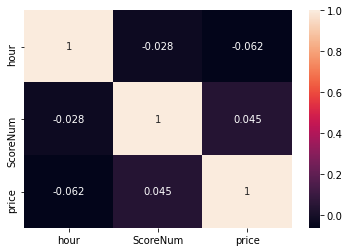

In [180]:
import seaborn as sns

Var_Corr = sentimentmerged.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

## no correlation

In [184]:
##print out table to be able to quickly spot trends

total = df3.groupby(['ticker', 'SentType'], as_index=False).ScoreNum.mean()

display(total)

,ticker,SentType,ScoreNum
0,AAPL,neutral,0.840658
1,AAPL,positive,0.602924
2,AMC,neutral,0.874560
3,AMC,positive,0.721130
4,AMD,negative,0.582820
5,BABA,neutral,0.850747
6,BAC,negative,0.623987
7,BAC,neutral,0.807712
8,BAC,positive,0.794752
9,BB,negative,0.685314
